In [298]:
import pandas as pd
import numpy as np
import os 
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate

In [299]:
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_train = np.array(y_train)
y_train = y_train.flatten()

In [300]:
print(
    X_train.shape,
    y_train.shape
)

(734, 14) (734,)


In [301]:
models = [DecisionTreeClassifier(),RandomForestClassifier(),SVC(),LogisticRegression(),GradientBoostingClassifier(),KNeighborsClassifier(),GaussianNB(),SGDClassifier()]

In [302]:
def evaluate(models):
    metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': []}
    
    for m in models:
        skf = StratifiedKFold(n_splits=5)
        y_pred = cross_val_predict(m, X_train, y_train, cv=skf)
        
        accuracy = accuracy_score(y_train, y_pred)
        precision = precision_score(y_train, y_pred)
        recall = recall_score(y_train, y_pred)
        f1 = f1_score(y_train, y_pred)
        
        metrics['Model'].append(str(m).split('(')[0])
        metrics['Accuracy'].append(accuracy)
        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['F1'].append(f1)
    
    df_metrics = pd.DataFrame(metrics)
    df_metrics = df_metrics.sort_values(by='F1', ascending=False)
    
    # Print the results in a formatted table
    print(tabulate(df_metrics, headers='keys', tablefmt='pretty', showindex=False))


In [303]:
def evaluate(models):
    metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': []}
    
    for m in models:
        skf = StratifiedKFold(n_splits=5)
        y_pred = cross_val_predict(m, X_train, y_train, cv=skf)
        
        accuracy = accuracy_score(y_train, y_pred)
        precision = precision_score(y_train, y_pred)
        recall = recall_score(y_train, y_pred)
        f1 = f1_score(y_train, y_pred)
        
        metrics['Model'].append(str(m).split('(')[0])
        metrics['Accuracy'].append(accuracy)
        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['F1'].append(f1)
    
    df_metrics = pd.DataFrame(metrics)
    df_metrics = df_metrics.sort_values(by='F1', ascending=False)
    
    # Plot metrics in a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    ax_iter = axes.flat
    
    palette = sns.color_palette("pastel", len(models))  # Assign a color palette to models

    for metric in df_metrics.columns[1:]:
        ax = next(ax_iter)
        sns.barplot(data=df_metrics, x='Model', y=metric, ax=ax, palette=palette,hue='Model',legend=False)
        ax.set_title(metric)
        ax.set_ylabel('Score')
        ax.set_xlabel('Model')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Print the results in a formatted table
    print(tabulate(df_metrics, headers='keys', tablefmt='pretty', showindex=False))



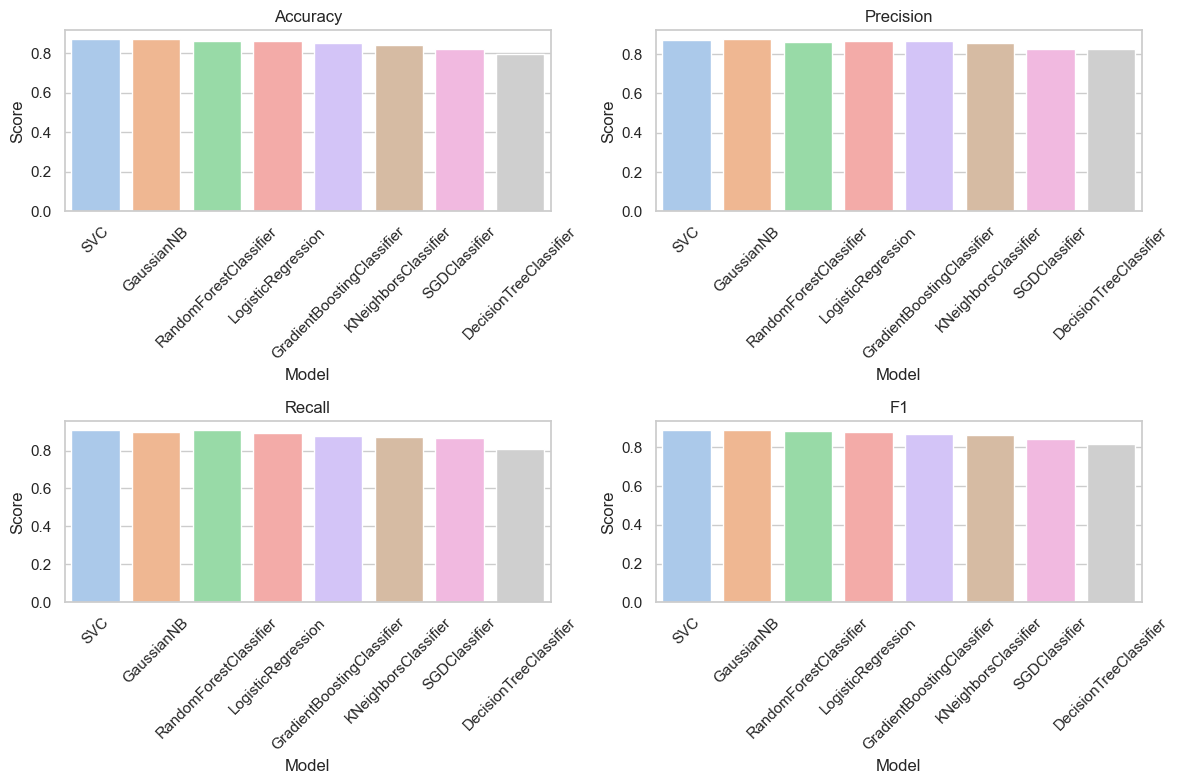

+----------------------------+--------------------+--------------------+--------------------+--------------------+
|           Model            |      Accuracy      |     Precision      |       Recall       |         F1         |
+----------------------------+--------------------+--------------------+--------------------+--------------------+
|            SVC             | 0.8732970027247956 | 0.8726851851851852 | 0.908433734939759  | 0.8902007083825265 |
|         GaussianNB         | 0.8719346049046321 | 0.8776470588235294 | 0.8987951807228916 | 0.888095238095238  |
|   RandomForestClassifier   | 0.8637602179836512 | 0.8604118993135011 | 0.9060240963855422 | 0.8826291079812206 |
|     LogisticRegression     | 0.8637602179836512 | 0.8688524590163934 | 0.8939759036144578 | 0.8812351543942993 |
| GradientBoostingClassifier | 0.8542234332425068 | 0.8666666666666667 | 0.8771084337349397 | 0.8718562874251496 |
|    KNeighborsClassifier    | 0.8446866485013624 | 0.8557919621749409 | 0.87228

In [304]:
evaluate(models)

In [305]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
features = rf.feature_importances_
sorted(zip(features, X_train.columns),reverse=True)

[(0.12936515572338986, 'cat__ST_Slope_Up'),
 (0.10879001260758478, 'coleste__Cholesterol'),
 (0.10490190342299882, 'num_zero__Oldpeak'),
 (0.09988842724958975, 'num_nonzero__MaxHR'),
 (0.09866886944469198, 'cat__ChestPainType_ASY'),
 (0.0909039436818352, 'cat__ST_Slope_Flat'),
 (0.07335065250624356, 'cat__ExerciseAngina_N'),
 (0.07219388266620516, 'num_nonzero__Age'),
 (0.07082383280452524, 'num_zero__RestingBP'),
 (0.05625574334268947, 'cat__ExerciseAngina_Y'),
 (0.03663327704412324, 'gender__Sex'),
 (0.024488453185092716, 'num_zero__FastingBS'),
 (0.02133653267295242, 'cat__ChestPainType_ATA'),
 (0.012399313648077885, 'cat__ChestPainType_NAP')]